Label:  4
Vorhersage:  4
F1-Score: 0.9932926951491272


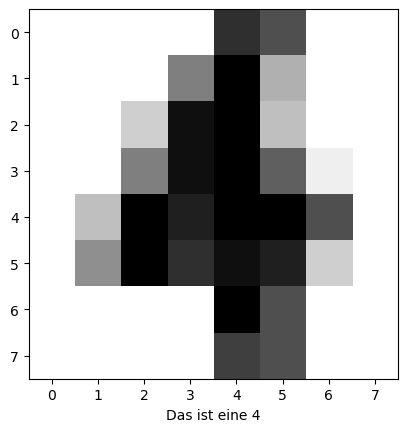

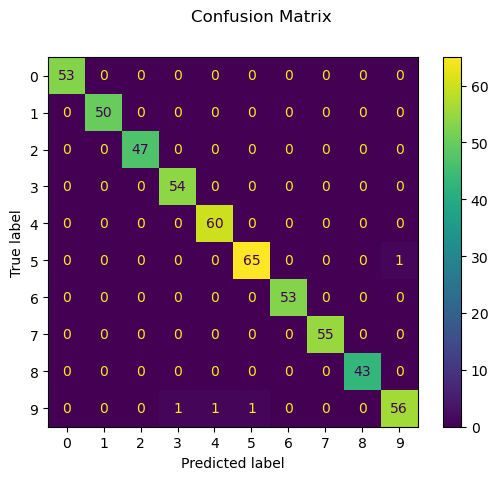

In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

ziffern_datensatz = datasets.load_digits()
ziffern_bilder = ziffern_datensatz.images
ziffern_labels = ziffern_datensatz.target

ziffern_bilder = ziffern_bilder.reshape((len(ziffern_bilder), -1))

X_train, X_test, Y_train, Y_test = train_test_split(
    ziffern_bilder, ziffern_labels, test_size=0.3, shuffle=True, random_state=42
)

k = 5
klassifizierer = neighbors.KNeighborsClassifier(n_neighbors=k)
klassifizierer.fit(X_train, Y_train)

ziffern_vorhersagen = klassifizierer.predict(X_test)

ziffern_nummer = 222
print("Label: ", Y_test[ziffern_nummer])
print("Vorhersage: ", ziffern_vorhersagen[ziffern_nummer])
fig, ax = plt.subplots()
ax.set_xlabel("Das ist eine " + str(Y_test[ziffern_nummer]))
ax.imshow(X_test[ziffern_nummer].reshape((8, 8)), cmap=plt.cm.gray_r)

print("F1-Score:",
      metrics.f1_score(Y_test, ziffern_vorhersagen, average='macro'))

m = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, ziffern_vorhersagen)
m.figure_.suptitle("Confusion Matrix")

plt.show()
